Hi.........This is Rohit Jaiswal. And this is the second project of data science internship at OASIS Infobyte.

# Import Libraries.............

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# Reading the data................

In [2]:
data = pd.read_csv('UnemploymentInIndia.csv')

In [3]:
display(data)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data=data.dropna()

In [28]:
data['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [29]:
import re
path='[A-Za-z]*'
p=-1
for i in data['Frequency']:
    p+=1
    k=re.findall(path,i)
    if len(k)==3:
        data['Frequency'][p]=re.findall(path,i)[1]
    else:
        data['Frequency'][p]=re.findall(path,i)[0]

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\2213410991.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\2213410991.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\2213410991.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\2213410991.py:10: SettingWithCopyWarning:


A value 

In [30]:
import re
path='[A-Za-z]*'
re.findall(path,'Monthly')

['Monthly', '']

In [31]:
data['Frequency'][9]

'Monthly'

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   States                                  740 non-null    object 
 1   Date                                    740 non-null    object 
 2   Frequency                               740 non-null    object 
 3   Estimated Unemployment Rate(%)          740 non-null    float64
 4   Estimated Employed                      740 non-null    float64
 5   Estimated Labour Participation Rate(%)  740 non-null    float64
 6   Area                                    740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 62.4+ KB


In [34]:
# Checking null value in dataset........
print(data.isnull().sum())

States                                    0
Date                                      0
Frequency                                 0
Estimated Unemployment Rate(%)            0
Estimated Employed                        0
Estimated Labour Participation Rate(%)    0
Area                                      0
dtype: int64


# Renaming of columns ....................

In [35]:
data.columns=["States","Date","Frequency","Estimated Unemployment Rate(%)","Estimated Employed","Estimated Labour Participation Rate(%)","Area"]

In [36]:
print(data)

             States         Date Frequency  Estimated Unemployment Rate(%)  \
0    Andhra Pradesh   31-05-2019   Monthly                            3.65   
1    Andhra Pradesh   30-06-2019   Monthly                            3.05   
2    Andhra Pradesh   31-07-2019   Monthly                            3.75   
3    Andhra Pradesh   31-08-2019   Monthly                            3.32   
4    Andhra Pradesh   30-09-2019   Monthly                            5.17   
..              ...          ...       ...                             ...   
749     West Bengal   29-02-2020   Monthly                            7.55   
750     West Bengal   31-03-2020   Monthly                            6.67   
751     West Bengal   30-04-2020   Monthly                           15.63   
752     West Bengal   31-05-2020   Monthly                           15.22   
753     West Bengal   30-06-2020   Monthly                            9.86   

     Estimated Employed  Estimated Labour Participation Rate(%)

# Data Visualizing............

### Creating HeatMap

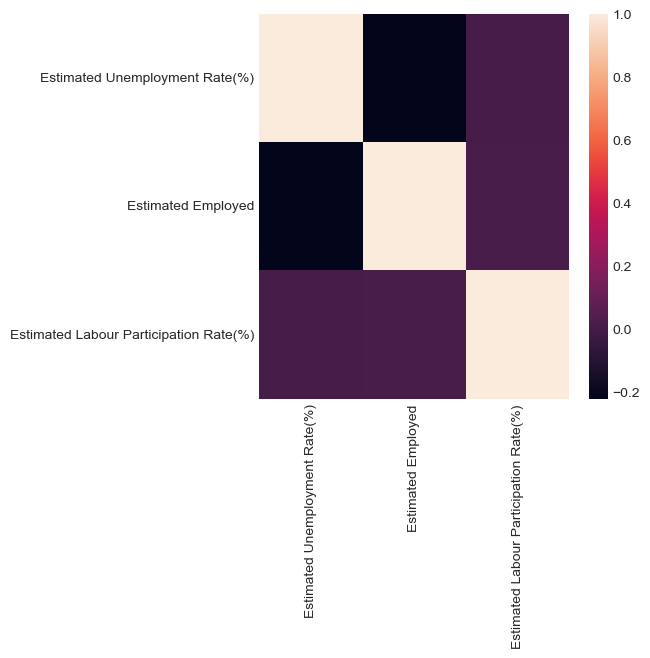

In [37]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(5,5))
sns.heatmap(data.corr())
plt.show()

### Creating Histogram based on Estimated Employed

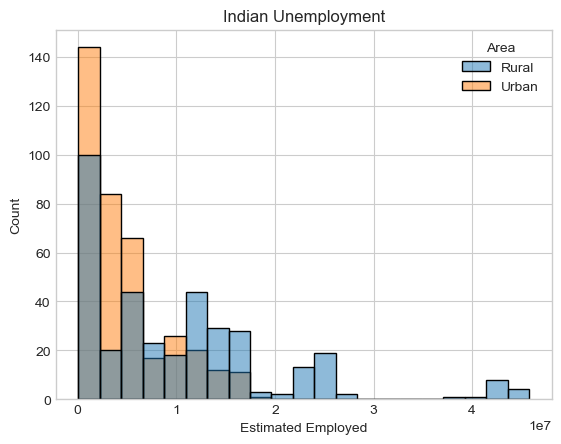

In [38]:
data.columns=["States","Date","Frequency","Estimated Unemployment Rate(%)","Estimated Employed","Estimated Labour Participation Rate(%)","Area"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed",hue="Area", data=data)
plt.show()

### Creating Histogram based on Unemployment Rate

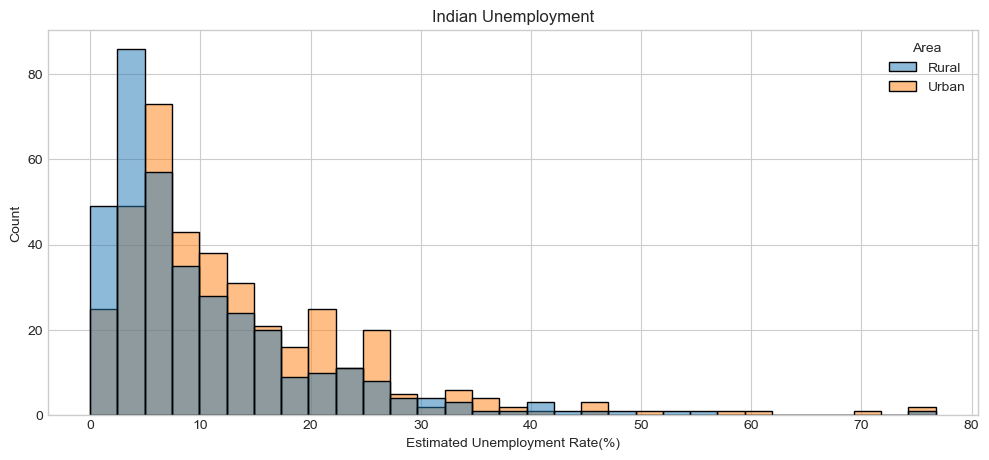

In [39]:
plt.figure(figsize=(12,5))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate(%)",hue="Area",data=data)
plt.show()

## Creating dashboard to analyze the unemployment rate due to Covid-19

In [40]:
Unemployment= data[["States","Area","Estimated Unemployment Rate(%)"]]
figure = px.sunburst(Unemployment,path=["Area","States"],
                    values="Estimated Unemployment Rate(%)",
                    width = 700, height = 700, color_continuous_scale = "RdY1Gn",
                    title="Unemployment Rate in India")
figure.show()
     

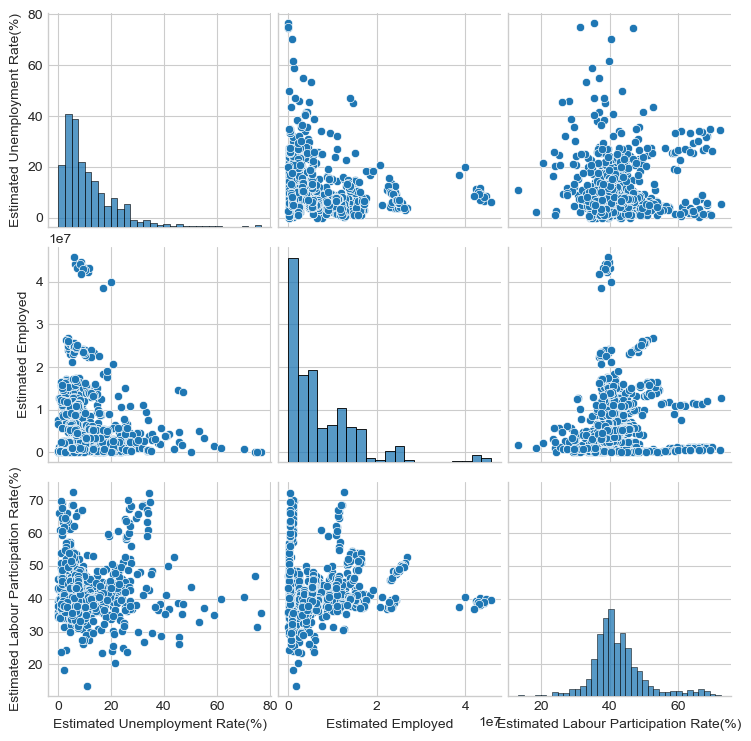

In [41]:
sns.pairplot(data)

In [43]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [44]:
X=data[['States', 'Date',
       'Estimated Employed', 'Estimated Labour Participation Rate(%)', 'Area']]
y=data[[ 'Estimated Unemployment Rate(%)']]

In [45]:
X['States'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [46]:
X['States']=X['States'].replace(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\1292559848.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
X['Area']=X['Area'].replace(['Rural','Urban'],[0,1])

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\2329568954.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
import re
path='[0-9-]*'
p=-1
for i in X['Date']:
    p+=1
    X['Date'][p]=re.findall(path,i)[1]

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\427595819.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\427595819.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\427595819.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\427595819.py:6: SettingWithCopyWarning:


A value is tryi

In [49]:
X['Date']

0       31-05-2019
1       30-06-2019
2       31-07-2019
3       31-08-2019
4       30-09-2019
          ...     
749     29-02-2020
750     31-03-2020
751     30-04-2020
752     31-05-2020
753     30-06-2020
Name: Date, Length: 740, dtype: object

In [51]:
X

,States,Date,Estimated Employed,Estimated Labour Participation Rate(%),Area
0,0,31-05-2019,11999139.0,43.24,0
1,0,30-06-2019,11755881.0,42.05,0
2,0,31-07-2019,12086707.0,43.50,0
3,0,31-08-2019,12285693.0,43.97,0
4,0,30-09-2019,12256762.0,44.68,0
...,...,...,...,...,...
749,26,29-02-2020,10871168.0,44.09,1
750,26,31-03-2020,10806105.0,43.34,1
751,26,30-04-2020,9299466.0,41.20,1
752,26,31-05-2020,9240903.0,40.67,1


In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [53]:
X_train

,States,Date,Estimated Employed,Estimated Labour Participation Rate(%),Area
273,20,31-12-2019,161647.0,46.30,0
558,12,30-04-2020,2179106.0,20.51,1
648,19,30-09-2019,5176819.0,39.15,1
518,9,30-06-2020,937435.0,33.33,1
439,3,31-05-2020,1276291.0,30.24,1
...,...,...,...,...,...
659,20,31-08-2019,89702.0,48.13,1
729,25,31-08-2019,823967.0,31.21,1
72,5,30-09-2019,163215.0,35.78,0
235,17,30-09-2019,175718.0,43.34,0


In [54]:
y_train

,Estimated Unemployment Rate(%)
273,1.00
558,21.43
648,12.63
518,12.96
439,24.10
...,...
659,7.76
729,7.43
72,3.61
235,0.00
